In [386]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp


df = pd.read_csv('merge-billboard-gdp-df.csv')
gdp = pd.read_csv('GDPC1.csv')
gdp['DATE'] = pd.to_datetime(gdp['DATE'], format='%Y-%m')
gdp['DATE'] = pd.PeriodIndex(gdp['DATE'], freq='Q')
gdp.rename(columns={"DATE":"date"}, inplace=True)
df

C:\Users\java\AppData\Local\Temp\ipykernel_6588\2211190949.py:6: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



date      track_artist  track_lp track_new  track_pp  track_rank  \
0       1960Q1     Marty Robbins       2.0     False       1.0           1   
1       1960Q1    Frankie Avalon       1.0     False       1.0           2   
2       1960Q1  Miss Toni Fisher       3.0     False       3.0           3   
3       1960Q1    Johnny Preston      11.0     False       4.0           4   
4       1960Q1    Freddie Cannon       5.0     False       5.0           5   
...        ...               ...       ...       ...       ...         ...   
190869  2016Q1          J Balvin       NaN       NaN       NaN          96   
190870  2016Q1            Hozier       NaN       NaN       NaN          97   
190871  2016Q1      Joey Montana       NaN       NaN       NaN          98   
190872  2016Q1          Yo Gotti       NaN       NaN       NaN          99   
190873  2016Q1             Nelly       NaN       NaN       NaN         100   

                           track_title  track_weeks      GDPC1  
0                              El Paso          9.0   3277.847  
1                                  Why          7.0   3277.847  
2                         The Big Hurt          8.0   3277.847  
3                         Running Bear         12.0   3277.847  
4       Way Down Yonder In New Orleans          7.0   3277.847  
...                                ...          ...        ...  
190869                           Ginza          NaN  17565.465  
190870               Take Me To Church          NaN  17565.465  
190871                           Picky          NaN  17565.465  
190872                  Down In the DM          NaN  17565.465  
190873                         The Fix          NaN  17565.465  

[190874 rows x 9 columns]

In [387]:
df['rank_gain/loss'] = df['track_lp'] - df['track_rank']
df.dropna(inplace=True)
df

date         track_artist  track_lp track_new  track_pp  track_rank  \
0       1960Q1        Marty Robbins       2.0     False       1.0           1   
1       1960Q1       Frankie Avalon       1.0     False       1.0           2   
2       1960Q1     Miss Toni Fisher       3.0     False       3.0           3   
3       1960Q1       Johnny Preston      11.0     False       4.0           4   
4       1960Q1       Freddie Cannon       5.0     False       5.0           5   
...        ...                  ...       ...       ...       ...         ...   
182275  2021Q4         Walker Hayes      35.0     False       3.0          45   
182276  2021Q4        Nat King Cole       0.0     False      43.0          46   
182277  2021Q4        Michael Buble       0.0     False      47.0          47   
182278  2021Q4  Vince Guaraldi Trio       0.0      True      48.0          48   
182279  2021Q4            Lil Nas X      45.0     False      10.0          49   

                                   track_title  track_weeks      GDPC1  \
0                                      El Paso          9.0   3277.847   
1                                          Why          7.0   3277.847   
2                                 The Big Hurt          8.0   3277.847   
3                                 Running Bear         12.0   3277.847   
4               Way Down Yonder In New Orleans          7.0   3277.847   
...                                        ...          ...        ...   
182275                              Fancy Like         27.0  19806.290   
182276                          Deck The Halls          3.0  19806.290   
182277  Have Yourself A Merry Little Christmas          2.0  19806.290   
182278                   Christmastime Is Here          1.0  19806.290   
182279                       Thats What I Want         14.0  19806.290   

        rank_gain/loss  
0                  1.0  
1                 -1.0  
2                  0.0  
3                  7.0  
4                  0.0  
...                ...  
182275           -10.0  
182276           -46.0  
182277           -47.0  
182278           -48.0  
182279            -4.0  

[182280 rows x 10 columns]

In [388]:
df['qtr'] = 1
df['date'] = pd.to_datetime(df['date'])
df['last_qtr'] = df['date'] - df['qtr'].map(pd.offsets.QuarterBegin)
df['last_qtr'] = pd.to_datetime(df['last_qtr'])
df['second_last_qtr'] = df['last_qtr'] - df['qtr'].map(pd.offsets.QuarterBegin)
df.drop(columns='qtr', inplace=True)
df['last_qtr'] = pd.PeriodIndex(df['last_qtr'], freq='Q')
df['second_last_qtr'] = pd.PeriodIndex(df['second_last_qtr'], freq='Q')
df['date'] = pd.PeriodIndex(df['date'], freq='Q')
df = pd.merge(left=df, left_on='last_qtr', right=gdp, right_on='date', how='left')
df = pd.merge(left=df, left_on='second_last_qtr', right=gdp, right_on='date', how='left')
df


C:\Users\java\Documents\GitHub\economic-impacts-on-music\lib\site-packages\pandas\core\arrays\datetimelike.py:1189: PerformanceWarning:

Adding/subtracting object-dtype array to DatetimeArray not vectorized.

C:\Users\java\Documents\GitHub\economic-impacts-on-music\lib\site-packages\pandas\core\arrays\datetimelike.py:1189: PerformanceWarning:

Adding/subtracting object-dtype array to DatetimeArray not vectorized.



date_x         track_artist  track_lp track_new  track_pp  track_rank  \
0       1960Q1        Marty Robbins       2.0     False       1.0           1   
1       1960Q1       Frankie Avalon       1.0     False       1.0           2   
2       1960Q1     Miss Toni Fisher       3.0     False       3.0           3   
3       1960Q1       Johnny Preston      11.0     False       4.0           4   
4       1960Q1       Freddie Cannon       5.0     False       5.0           5   
...        ...                  ...       ...       ...       ...         ...   
182275  2021Q4         Walker Hayes      35.0     False       3.0          45   
182276  2021Q4        Nat King Cole       0.0     False      43.0          46   
182277  2021Q4        Michael Buble       0.0     False      47.0          47   
182278  2021Q4  Vince Guaraldi Trio       0.0      True      48.0          48   
182279  2021Q4            Lil Nas X      45.0     False      10.0          49   

                                   track_title  track_weeks    GDPC1_x  \
0                                      El Paso          9.0   3277.847   
1                                          Why          7.0   3277.847   
2                                 The Big Hurt          8.0   3277.847   
3                                 Running Bear         12.0   3277.847   
4               Way Down Yonder In New Orleans          7.0   3277.847   
...                                        ...          ...        ...   
182275                              Fancy Like         27.0  19806.290   
182276                          Deck The Halls          3.0  19806.290   
182277  Have Yourself A Merry Little Christmas          2.0  19806.290   
182278                   Christmastime Is Here          1.0  19806.290   
182279                       Thats What I Want         14.0  19806.290   

        rank_gain/loss last_qtr second_last_qtr  date_y    GDPC1_y    date  \
0                  1.0   1959Q4          1959Q3  1959Q4   3205.790  1959Q3   
1                 -1.0   1959Q4          1959Q3  1959Q4   3205.790  1959Q3   
2                  0.0   1959Q4          1959Q3  1959Q4   3205.790  1959Q3   
3                  7.0   1959Q4          1959Q3  1959Q4   3205.790  1959Q3   
4                  0.0   1959Q4          1959Q3  1959Q4   3205.790  1959Q3   
...                ...      ...             ...     ...        ...     ...   
182275           -10.0   2021Q3          2021Q2  2021Q3  19478.893  2021Q2   
182276           -46.0   2021Q3          2021Q2  2021Q3  19478.893  2021Q2   
182277           -47.0   2021Q3          2021Q2  2021Q3  19478.893  2021Q2   
182278           -48.0   2021Q3          2021Q2  2021Q3  19478.893  2021Q2   
182279            -4.0   2021Q3          2021Q2  2021Q3  19478.893  2021Q2   

            GDPC1  
0        3196.683  
1        3196.683  
2        3196.683  
3        3196.683  
4        3196.683  
...           ...  
182275  19368.310  
182276  19368.310  
182277  19368.310  
182278  19368.310  
182279  19368.310  

[182280 rows x 16 columns]

In [389]:
df['gdp_last_change'] = df['GDPC1_y'] - df['GDPC1_x']
df['gdp_second_last_change'] = df['GDPC1'] - df['GDPC1_y']

df['gdp_raise'] = df['gdp_last_change'].apply(lambda x : 1 if x > 0 else 0)
df['gdp_raise_2'] = df['gdp_second_last_change'].apply(lambda x : 1 if x > 0 else 0)
df['gdp_drop'] = df['gdp_last_change'].apply(lambda x : 1 if x < 0 else 0)
df['gdp_drop_2'] = df['gdp_second_last_change'].apply(lambda x : 1 if x < 0 else 0)

df

date_x         track_artist  track_lp track_new  track_pp  track_rank  \
0       1960Q1        Marty Robbins       2.0     False       1.0           1   
1       1960Q1       Frankie Avalon       1.0     False       1.0           2   
2       1960Q1     Miss Toni Fisher       3.0     False       3.0           3   
3       1960Q1       Johnny Preston      11.0     False       4.0           4   
4       1960Q1       Freddie Cannon       5.0     False       5.0           5   
...        ...                  ...       ...       ...       ...         ...   
182275  2021Q4         Walker Hayes      35.0     False       3.0          45   
182276  2021Q4        Nat King Cole       0.0     False      43.0          46   
182277  2021Q4        Michael Buble       0.0     False      47.0          47   
182278  2021Q4  Vince Guaraldi Trio       0.0      True      48.0          48   
182279  2021Q4            Lil Nas X      45.0     False      10.0          49   

                                   track_title  track_weeks    GDPC1_x  \
0                                      El Paso          9.0   3277.847   
1                                          Why          7.0   3277.847   
2                                 The Big Hurt          8.0   3277.847   
3                                 Running Bear         12.0   3277.847   
4               Way Down Yonder In New Orleans          7.0   3277.847   
...                                        ...          ...        ...   
182275                              Fancy Like         27.0  19806.290   
182276                          Deck The Halls          3.0  19806.290   
182277  Have Yourself A Merry Little Christmas          2.0  19806.290   
182278                   Christmastime Is Here          1.0  19806.290   
182279                       Thats What I Want         14.0  19806.290   

        rank_gain/loss  ...  date_y    GDPC1_y    date      GDPC1  \
0                  1.0  ...  1959Q4   3205.790  1959Q3   3196.683   
1                 -1.0  ...  1959Q4   3205.790  1959Q3   3196.683   
2                  0.0  ...  1959Q4   3205.790  1959Q3   3196.683   
3                  7.0  ...  1959Q4   3205.790  1959Q3   3196.683   
4                  0.0  ...  1959Q4   3205.790  1959Q3   3196.683   
...                ...  ...     ...        ...     ...        ...   
182275           -10.0  ...  2021Q3  19478.893  2021Q2  19368.310   
182276           -46.0  ...  2021Q3  19478.893  2021Q2  19368.310   
182277           -47.0  ...  2021Q3  19478.893  2021Q2  19368.310   
182278           -48.0  ...  2021Q3  19478.893  2021Q2  19368.310   
182279            -4.0  ...  2021Q3  19478.893  2021Q2  19368.310   

       gdp_last_change  gdp_second_last_change  gdp_raise  gdp_raise_2  \
0              -72.057                  -9.107          0            0   
1              -72.057                  -9.107          0            0   
2              -72.057                  -9.107          0            0   
3              -72.057                  -9.107          0            0   
4              -72.057                  -9.107          0            0   
...                ...                     ...        ...          ...   
182275        -327.397                -110.583          0            0   
182276        -327.397                -110.583          0            0   
182277        -327.397                -110.583          0            0   
182278        -327.397                -110.583          0            0   
182279        -327.397                -110.583          0            0   

        gdp_drop  gdp_drop_2  
0              1           1  
1              1           1  
2              1           1  
3              1           1  
4              1           1  
...          ...         ...  
182275         1           1  
182276         1           1  
182277         1           1  
182278         1           1  
182279         1           1  

[182280 rows x 22 columns]

In [390]:
df['recession'] = (df['gdp_drop'] == 1) & (df['gdp_drop_2'] == 1)
df['recession'] = df['recession'].astype(int)
df['track_new'] = df['track_new'].astype(int)


In [391]:
df.drop(columns=['gdp_raise', 'gdp_raise_2', 'gdp_drop', 'gdp_drop_2', 'last_qtr', 'second_last_qtr', 'date_y', 'GDPC1_y', 'date', 'GDPC1', 'gdp_last_change', 'gdp_second_last_change'], inplace=True)
df.rename(columns={"GDPC1_x":"GDP", "date_x":"date"}, inplace=True)

In [392]:
great_depression = df.loc[(df['date'] > '1929Q3') & (df['date'] <= '1933Q1')].to_csv('gd.csv', index=False)
rec_37_48 = df.loc[(df['date'] > '1937Q2') & (df['date'] <= '1949Q4')].to_csv('rec_37.csv', index=False)
grow_49 = df.loc[(df['date'] > '1949Q4') & (df['date'] <= '1953Q2')].to_csv('grow_49.csv', index=False)
rec_53 = df.loc[(df['date'] > '1953Q3') & (df['date'] <= '1954Q2')].to_csv('rec_53.csv', index=False)
rec_57 = df.loc[(df['date'] > '1957Q3') & (df['date'] <= '1958Q2')].to_csv('rec_57.csv', index=False)
rec_60 = df.loc[(df['date'] > '1960Q2') & (df['date'] <= '1961Q1')].to_csv('rec_60.csv', index=False)
grow_60 = df.loc[(df['date'] > '1961Q1') & (df['date'] <= '1969Q4')].to_csv('grow_60.csv', index=False)
rec_69 = df.loc[(df['date'] > '1969Q4') & (df['date'] <= '1970Q4')].to_csv('rec_69.csv', index=False)
grow_70_1 = df.loc[(df['date'] > '1970Q4') & (df['date'] <= '1973Q4')].to_csv('grow_70-3.csv', index=False)
rec_73_75 = df.loc[(df['date'] > '1973Q4') & (df['date'] <= '1975Q1')].to_csv('rec_73-75.csv', index=False)
grow_70_2 = df.loc[(df['date'] > '1975Q1') & (df['date'] <= '1980Q1')].to_csv('grow_75-9.csv', index=False)
rec_80 = df.loc[(df['date'] > '1980Q1') & (df['date'] <= '1980Q3')].to_csv('rec_80.csv', index=False)
rec_81_82 = df.loc[(df['date'] > '1981Q3') & (df['date'] <= '1982Q4')].to_csv('rec_81-2.csv', index=False)
grow_80 = df.loc[(df['date'] > '1982Q4') & (df['date'] <= '1990Q3')].to_csv('grow_80.csv', index=False)
rec_90 = df.loc[(df['date'] > '1990Q3') & (df['date'] <= '1991Q2')].to_csv('rec_90.csv', index=False)
dot_com_bubble = df.loc[(df['date'] > '1991Q1') & (df['date'] <= '2001Q1')].to_csv('dot_com.csv', index=False)
rec_2001_911 = df.loc[(df['date'] > '2001Q1') & (df['date'] < '2001Q4')].to_csv('rec_01-911.csv', index=False)
housing_bubble = df.loc[(df['date'] > '2001Q4') & (df['date'] <= '2007Q4')].to_csv('housing-bubble.csv', index=False)
rec_2008_2009 = df.loc[(df['date'] > '2007Q4') & (df['date'] <= '2009Q3')].to_csv('rec_08-09.csv', index=False)
regrowth = df.loc[(df['date'] > '2009Q4') & (df['date'] <= '2019Q4')].to_csv('regrowth_09-19.csv', index=False)
covid_19 = df.loc[(df['date'] > '2019Q4') & (df['date'] <= '2020Q2')].to_csv('covid19-20.csv', index=False)

In [397]:
df.to_csv('merge-billboard-gdp-df.csv', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182280 entries, 0 to 182279
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            182280 non-null  object 
 1   track_artist    182280 non-null  object 
 2   track_lp        182280 non-null  float64
 3   track_new       182280 non-null  int64  
 4   track_pp        182280 non-null  float64
 5   track_rank      182280 non-null  int64  
 6   track_title     182280 non-null  object 
 7   track_weeks     182280 non-null  float64
 8   GDP             182280 non-null  float64
 9   rank_gain/loss  182280 non-null  float64
 10  recession       182280 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 15.3+ MB


In [398]:
import pandas as pd
df = pd.read_csv('merge-billboard-gdp-df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182280 entries, 0 to 182279
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            182280 non-null  object 
 1   track_artist    182280 non-null  object 
 2   track_lp        182280 non-null  float64
 3   track_new       182280 non-null  int64  
 4   track_pp        182280 non-null  float64
 5   track_rank      182280 non-null  int64  
 6   track_title     182280 non-null  object 
 7   track_weeks     182280 non-null  float64
 8   GDP             182280 non-null  float64
 9   rank_gain/loss  182280 non-null  float64
 10  recession       182280 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 15.3+ MB


In [399]:
df.corr()

track_lp  track_new  track_pp  track_rank  track_weeks  \
track_lp        1.000000  -0.188781  0.793784    0.836785    -0.188728   
track_new      -0.188781   1.000000  0.081144    0.030764    -0.157131   
track_pp        0.793784   0.081144  1.000000    0.736130    -0.463499   
track_rank      0.836785   0.030764  0.736130    1.000000    -0.043052   
track_weeks    -0.188728  -0.157131 -0.463499   -0.043052     1.000000   
GDP            -0.075549   0.118185 -0.140918   -0.000109     0.395753   
rank_gain/loss  0.520816  -0.392580  0.301311   -0.031598    -0.277393   
recession      -0.004787  -0.001849 -0.006564    0.000076     0.006510   

                     GDP  rank_gain/loss  recession  
track_lp       -0.075549        0.520816  -0.004787  
track_new       0.118185       -0.392580  -0.001849  
track_pp       -0.140918        0.301311  -0.006564  
track_rank     -0.000109       -0.031598   0.000076  
track_weeks     0.395753       -0.277393   0.006510  
GDP             1.000000       -0.137742   0.045567  
rank_gain/loss -0.137742        1.000000  -0.008857  
recession       0.045567       -0.008857   1.000000

In [400]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [401]:
count_no_sub = len(df[df['recession']==0])
count_sub = len(df[df['recession']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of tracks from periods of growth is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of tracks from recessions is", pct_of_sub*100)

percentage of tracks from periods of growth is 20.161290322580644
percentage of tracks from recessions is 79.83870967741935


In [402]:
df.groupby('rank_gain/loss').mean()

track_lp  track_new   track_pp  track_rank  track_weeks  \
rank_gain/loss                                                            
-49.0                0.0   0.876033  46.603306        49.0     2.619835   
-48.0                0.0   0.881188  44.980198        48.0     2.524752   
-47.0                0.0   0.858268  45.149606        47.0     2.929134   
-46.0                0.0   0.857143  44.166667        46.0     3.000000   
-45.0                0.0   0.765306  42.887755        45.0     3.806122   
...                  ...        ...        ...         ...          ...   
 91.0               94.0   0.000000   3.000000         3.0     2.000000   
 92.0               94.0   0.000000   2.000000         2.0     2.000000   
 95.0               96.0   0.000000   1.000000         1.0     2.000000   
 96.0               97.0   0.000000   1.000000         1.0     2.000000   
 98.0              100.0   0.000000   2.000000         2.0     2.000000   

                         GDP  recession  
rank_gain/loss                           
-49.0           13537.065777   0.809917  
-48.0           13767.611970   0.831683  
-47.0           14222.241780   0.834646  
-46.0           13864.061631   0.845238  
-45.0           13625.156224   0.744898  
...                      ...        ...  
 91.0           15577.779000   1.000000  
 92.0           18767.778000   1.000000  
 95.0           15366.607000   0.000000  
 96.0           15187.475000   0.000000  
 98.0           18982.528000   1.000000  

[140 rows x 7 columns]

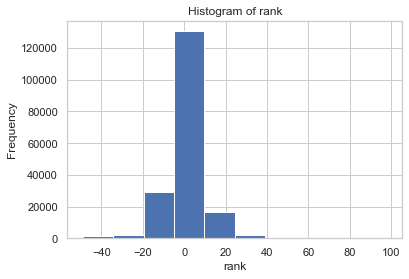

In [403]:
df['rank_gain/loss'].hist()
plt.title('Histogram of rank')
plt.xlabel('rank')
plt.ylabel('Frequency')
plt.savefig('hist_rank')

In [404]:
df = df[df['rank_gain/loss'] != 0]
df['sentiment'] = df['rank_gain/loss'].apply(lambda rating : +1 if rating > 0 else -1)

In [405]:
df

date         track_artist  track_lp  track_new  track_pp  \
0       1960Q1        Marty Robbins       2.0          0       1.0   
1       1960Q1       Frankie Avalon       1.0          0       1.0   
3       1960Q1       Johnny Preston      11.0          0       4.0   
6       1960Q1            Paul Anka       4.0          0       4.0   
7       1960Q1       Connie Francis       7.0          0       7.0   
...        ...                  ...       ...        ...       ...   
182275  2021Q4         Walker Hayes      35.0          0       3.0   
182276  2021Q4        Nat King Cole       0.0          0      43.0   
182277  2021Q4        Michael Buble       0.0          0      47.0   
182278  2021Q4  Vince Guaraldi Trio       0.0          1      48.0   
182279  2021Q4            Lil Nas X      45.0          0      10.0   

        track_rank                             track_title  track_weeks  \
0                1                                 El Paso          9.0   
1                2                                     Why          7.0   
3                4                            Running Bear         12.0   
6                7                        It's Time To Cry          7.0   
7                8                      Among My Souvenirs          7.0   
...            ...                                     ...          ...   
182275          45                              Fancy Like         27.0   
182276          46                          Deck The Halls          3.0   
182277          47  Have Yourself A Merry Little Christmas          2.0   
182278          48                   Christmastime Is Here          1.0   
182279          49                       Thats What I Want         14.0   

              GDP  rank_gain/loss  recession  sentiment  
0        3277.847             1.0          1          1  
1        3277.847            -1.0          1         -1  
3        3277.847             7.0          1          1  
6        3277.847            -3.0          1         -1  
7        3277.847            -1.0          1         -1  
...           ...             ...        ...        ...  
182275  19806.290           -10.0          1         -1  
182276  19806.290           -46.0          1         -1  
182277  19806.290           -47.0          1         -1  
182278  19806.290           -48.0          1         -1  
182279  19806.290            -4.0          1         -1  

[159349 rows x 12 columns]

In [406]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

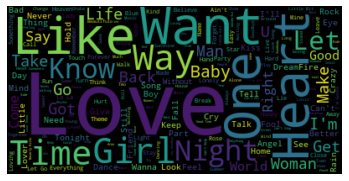

In [407]:
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.track_title)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

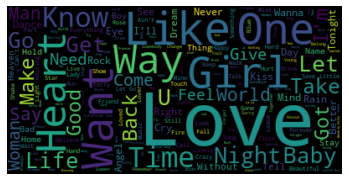

In [408]:
neg = " ".join(review for review in negative.track_title)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [409]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [410]:
df['track_title'].value_counts()[:8]

Stay           173
I Like It      138
Angel          132
Heaven         127
Without You    114
Crazy          113
Forever         98
Hold On         96
Name: track_title, dtype: int64

In [411]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['track_title'] = df['track_title'].apply(remove_punctuation)
df = df.dropna(subset=['track_title'])

In [412]:
dfNew = df[['track_title','sentiment']]
dfNew.head()

track_title  sentiment
0             El Paso          1
1                 Why         -1
3        Running Bear          1
6    It's Time To Cry         -1
7  Among My Souvenirs         -1

In [413]:
import numpy as np
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [414]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['track_title'])
test_matrix = vectorizer.transform(test['track_title'])

In [415]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [416]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [417]:
lr.fit(X_train,y_train)

C:\Users\java\Documents\GitHub\economic-impacts-on-music\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [418]:
predictions = lr.predict(X_test)

In [419]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 3473,  3116],
       [10785, 16577]], dtype=int64)

In [420]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.24      0.53      0.33      6589
           1       0.84      0.61      0.70     27362

    accuracy                           0.59     33951
   macro avg       0.54      0.57      0.52     33951
weighted avg       0.73      0.59      0.63     33951

